In [142]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [64]:
data = pd.read_csv('synthetic_alcohol_consumption.csv')
data.sample(5)

,Age,Gender,Occupation,Income Level,Education Level,Smoking Habit,Social Activity Level,Physical Activity Level,Region,Alcohol Consumption (ml/week)
94,35,Female,Professional,Medium,High School,Regular Smoker,Low,Low,Urban,177.60
226,19,Male,Student,High,Bachelor's,Non-smoker,Medium,Medium,Suburban,217.90
836,44,Female,Student,Low,Master's,Non-smoker,Medium,Low,Rural,127.74
716,34,Male,Retired,Medium,Bachelor's,Non-smoker,Medium,Medium,Rural,162.07
441,18,Male,Retired,Low,High School,Occasional Smoker,Medium,Medium,Urban,133.75


In [65]:
data.shape

(1000, 10)

In [66]:
data.dtypes

Age                                int64
Gender                            object
Occupation                        object
Income Level                      object
Education Level                   object
Smoking Habit                     object
Social Activity Level             object
Physical Activity Level           object
Region                            object
Alcohol Consumption (ml/week)    float64
dtype: object

In [67]:
data.dtypes.value_counts()

object     8
int64      1
float64    1
Name: count, dtype: int64

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            1000 non-null   int64  
 1   Gender                         1000 non-null   object 
 2   Occupation                     1000 non-null   object 
 3   Income Level                   1000 non-null   object 
 4   Education Level                1000 non-null   object 
 5   Smoking Habit                  1000 non-null   object 
 6   Social Activity Level          1000 non-null   object 
 7   Physical Activity Level        1000 non-null   object 
 8   Region                         1000 non-null   object 
 9   Alcohol Consumption (ml/week)  1000 non-null   float64
dtypes: float64(1), int64(1), object(8)
memory usage: 78.3+ KB


In [69]:
description = data.describe(include = 'number')
description

,Age,Alcohol Consumption (ml/week)
count,1000.000000,1000.000000
mean,44.385000,175.100640
std,15.321669,76.996329
min,18.000000,13.280000
25%,31.750000,118.140000
50%,45.000000,165.055000
75%,57.000000,221.187500
max,70.000000,432.410000


In [70]:
description_cat = pd.DataFrame(data.describe(exclude = 'number'))
description_cat

,Gender,Occupation,Income Level,Education Level,Smoking Habit,Social Activity Level,Physical Activity Level,Region
count,1000,1000,1000,1000,1000,1000,1000,1000
unique,3,4,3,4,3,3,3,3
top,Female,Retired,Medium,High School,Non-smoker,Medium,Medium,Urban
freq,508,276,403,491,605,467,420,474


In [71]:
cat_cols = []  

for col in data.columns: 
    if data[col].dtype == 'object': 
        cat_cols.append(col)  
  ### cat_cols = data.select_dtypes(exclude=['number']).columns.tolist()
cat_cols

['Gender',
 'Occupation',
 'Income Level',
 'Education Level',
 'Smoking Habit',
 'Social Activity Level',
 'Physical Activity Level',
 'Region']

In [72]:
num_cols = []
for col in data.columns:
    if data[col].dtype != 'object':
        num_cols.append(col)
num_cols

['Age', 'Alcohol Consumption (ml/week)']

C:\Users\USER\AppData\Local\anaconda3\envs\Python1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


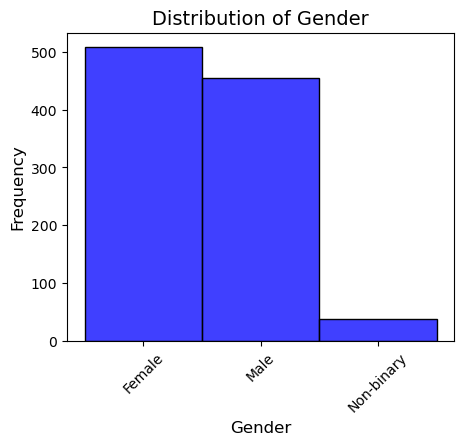

C:\Users\USER\AppData\Local\anaconda3\envs\Python1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


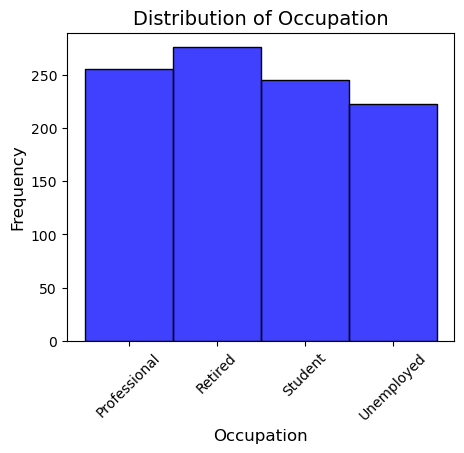

C:\Users\USER\AppData\Local\anaconda3\envs\Python1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


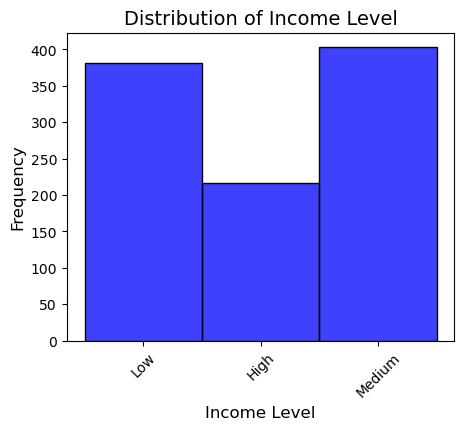

C:\Users\USER\AppData\Local\anaconda3\envs\Python1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


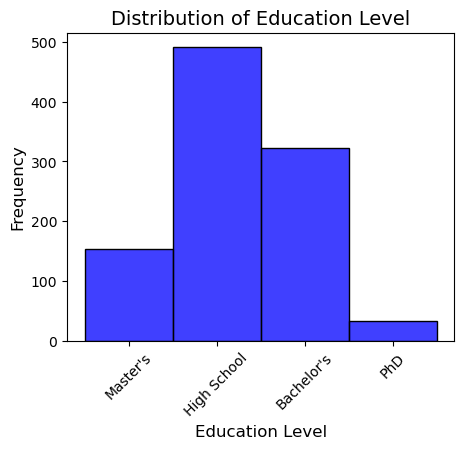

C:\Users\USER\AppData\Local\anaconda3\envs\Python1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


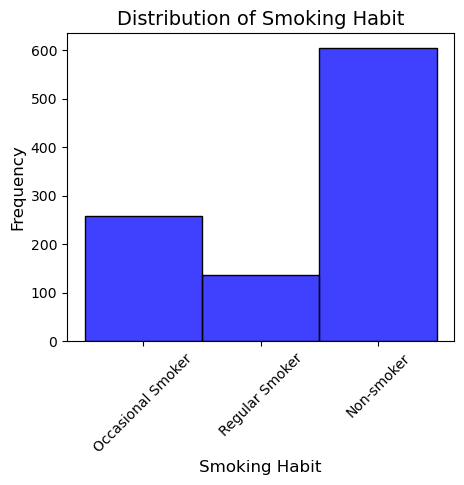

C:\Users\USER\AppData\Local\anaconda3\envs\Python1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


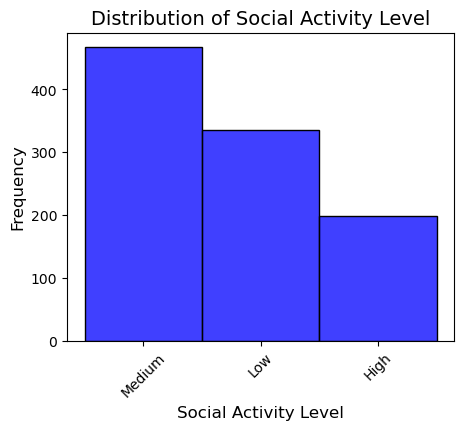

C:\Users\USER\AppData\Local\anaconda3\envs\Python1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


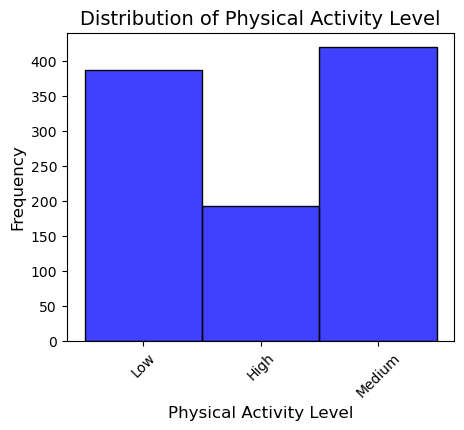

C:\Users\USER\AppData\Local\anaconda3\envs\Python1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


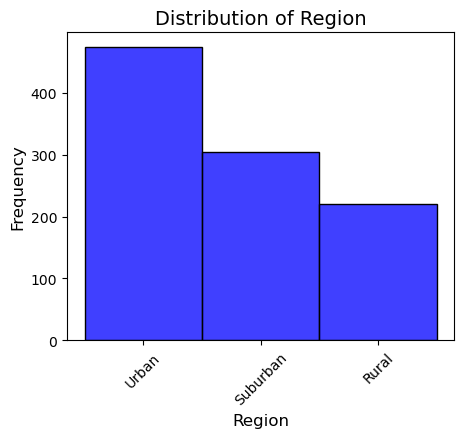

In [123]:
for col in cat_cols:
    plt.figure(figsize=(5, 4))  
    sns.histplot(data[col], kde=False, discrete=True, color='blue')
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.xticks(rotation=45)  # Rotate x-axis labels for readability
    plt.show()


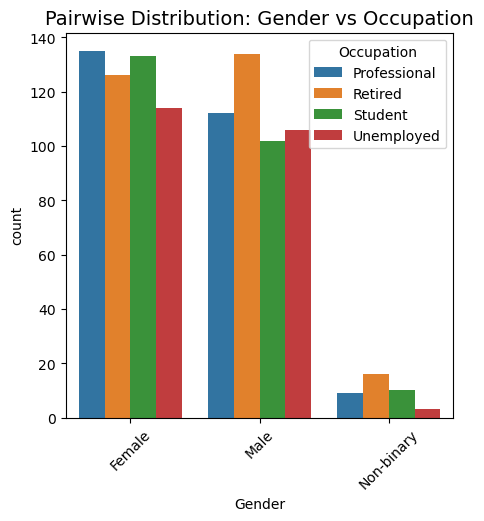

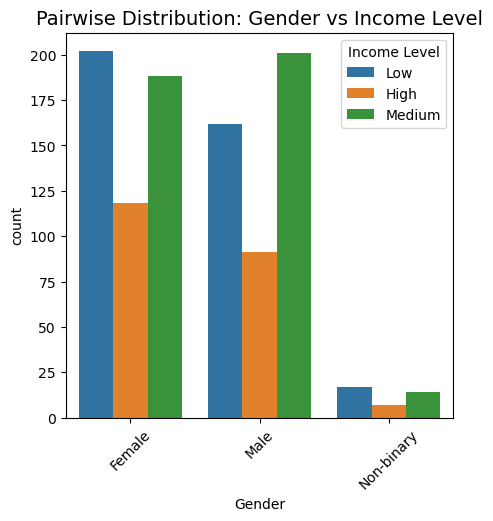

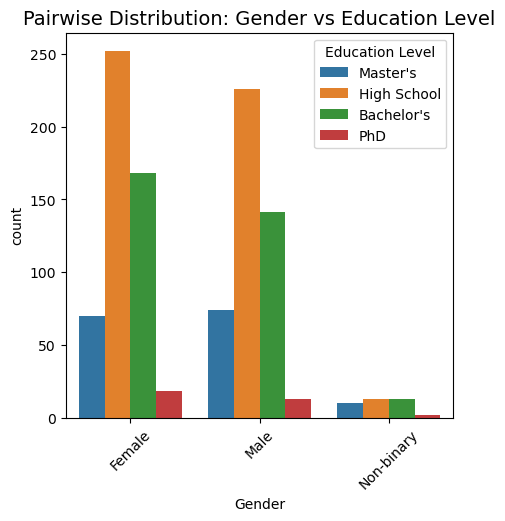

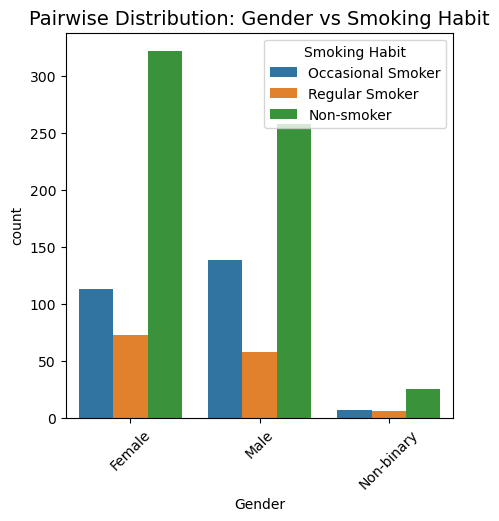

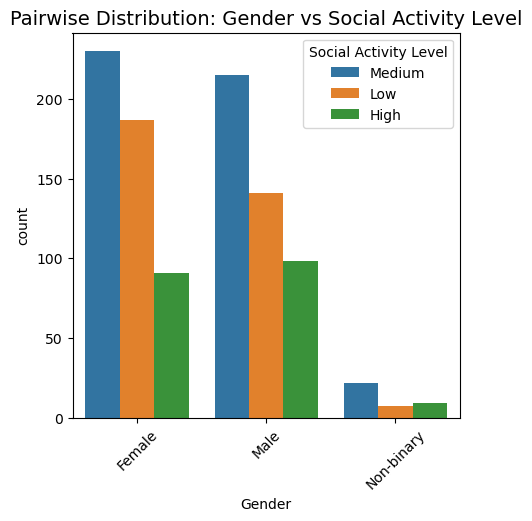

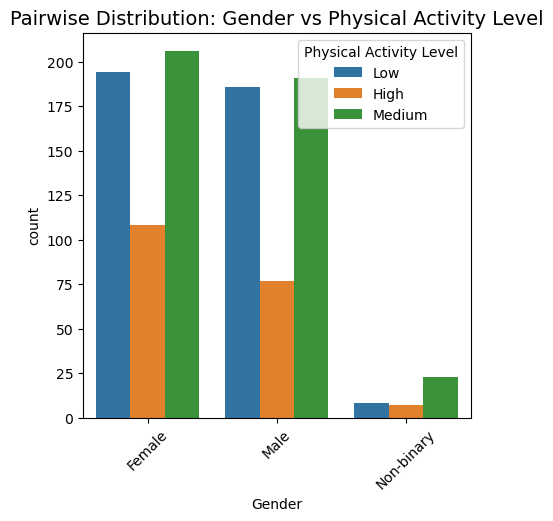

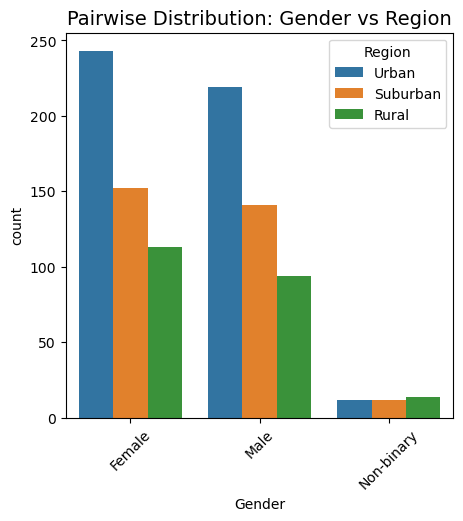

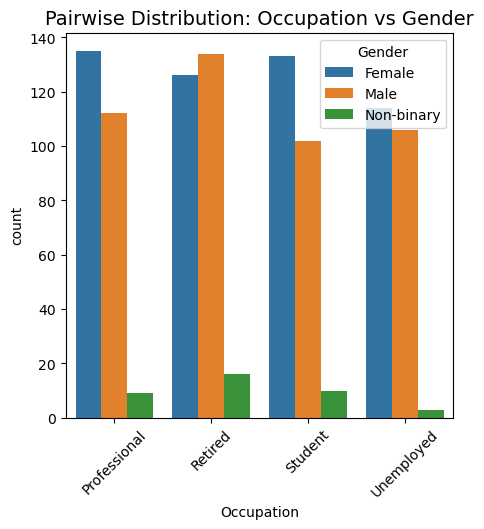

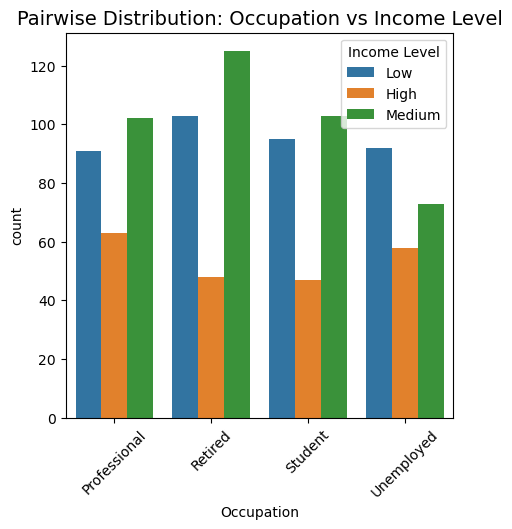

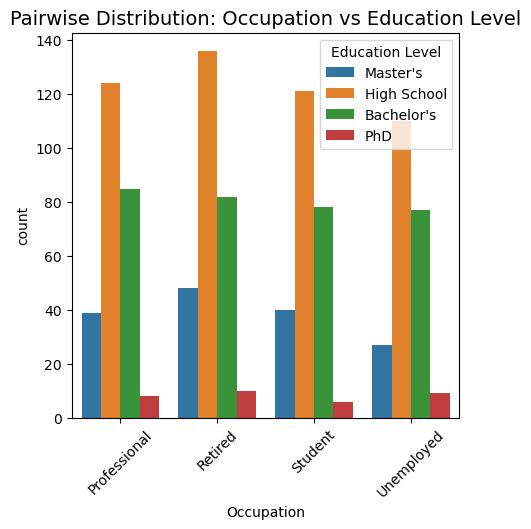

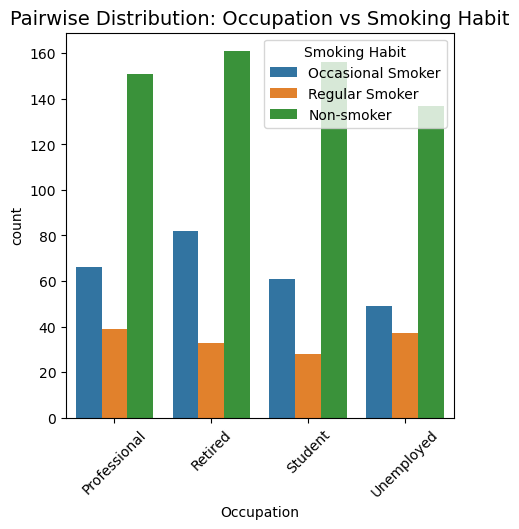

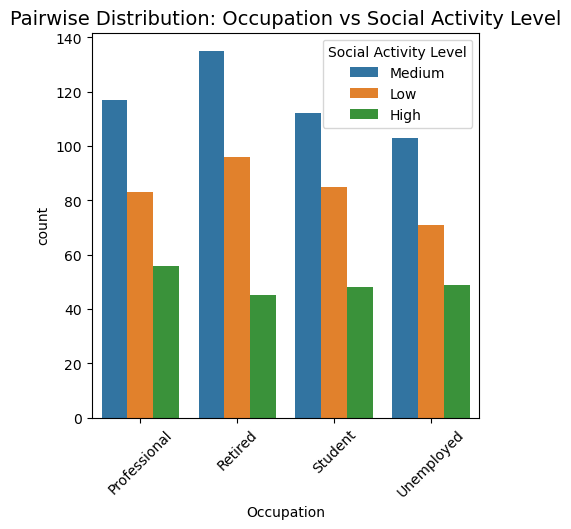

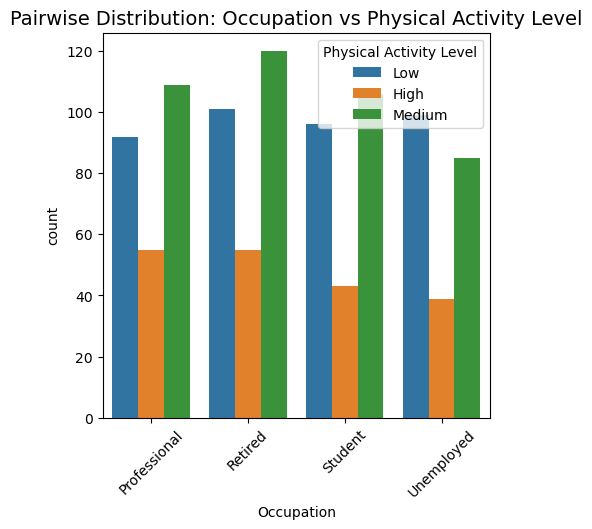

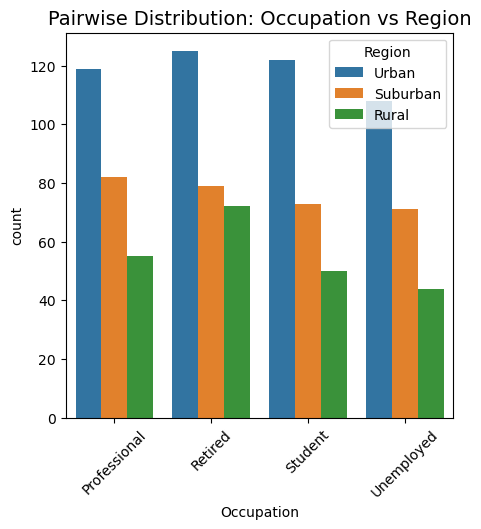

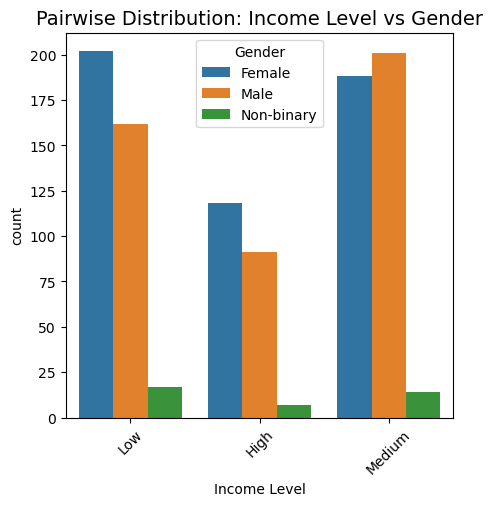

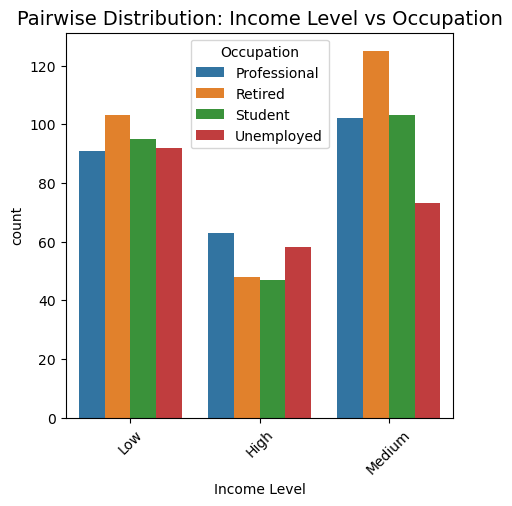

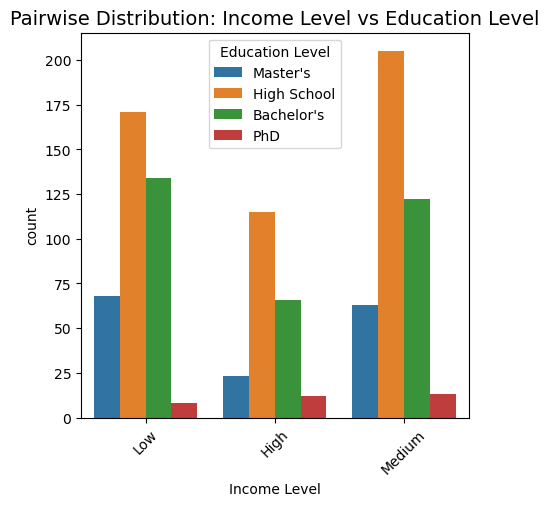

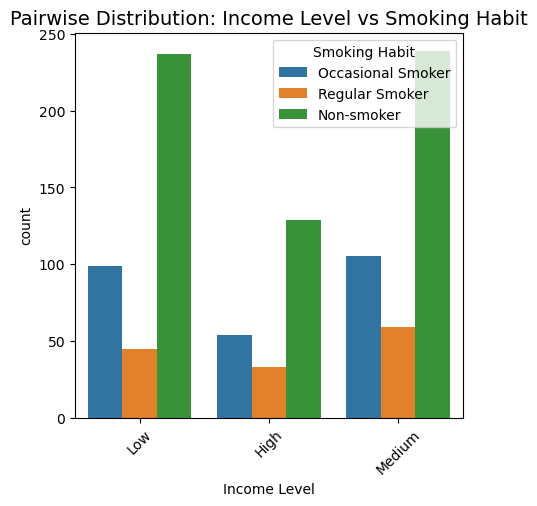

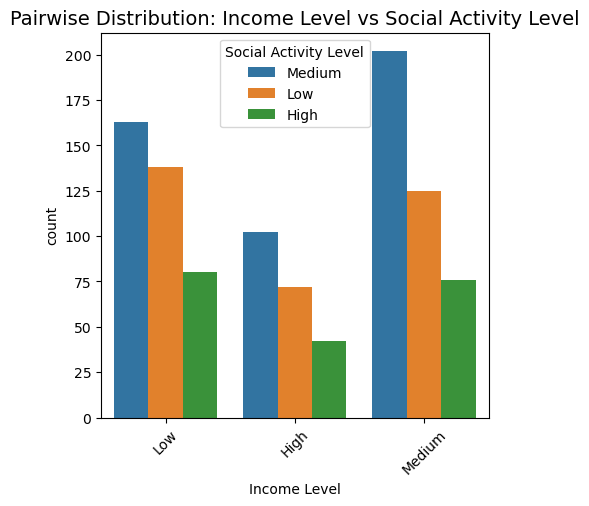

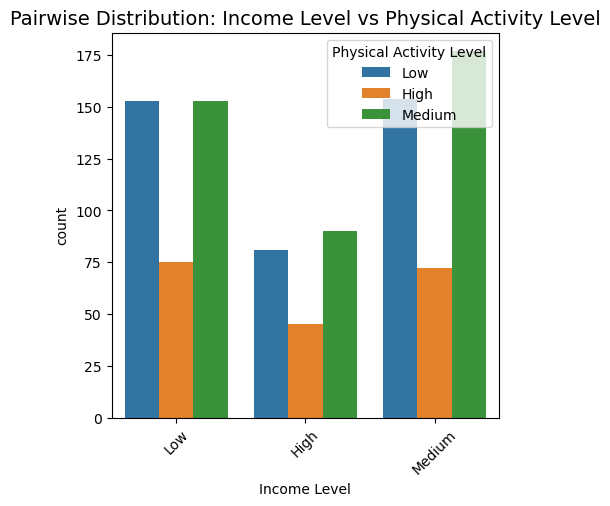

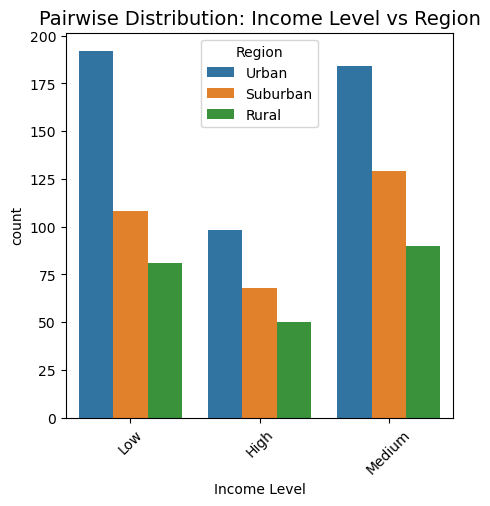

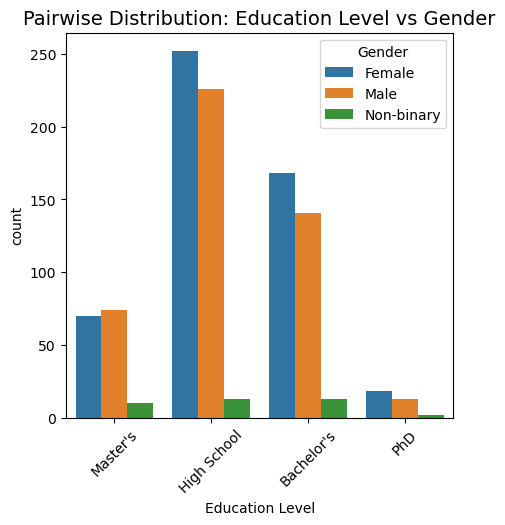

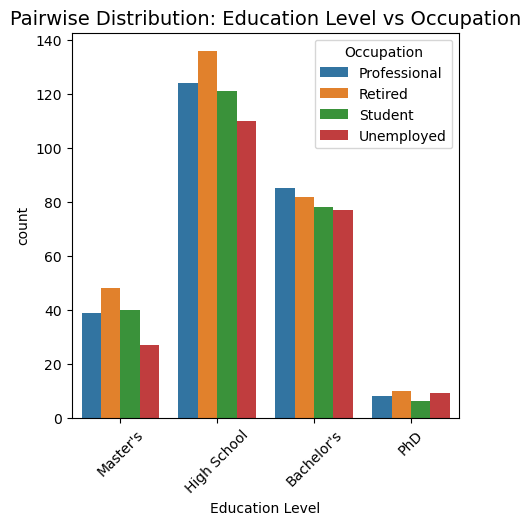

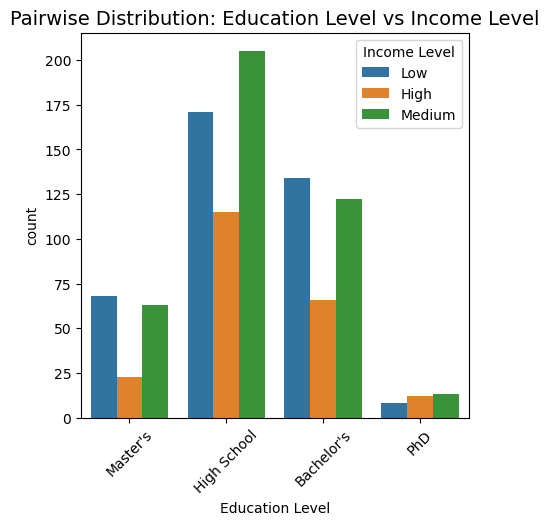

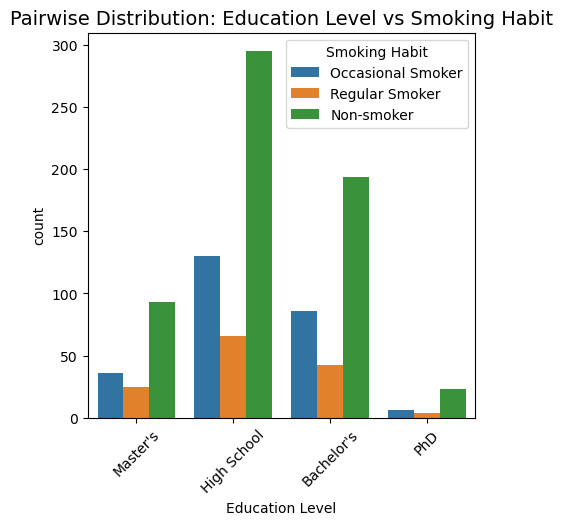

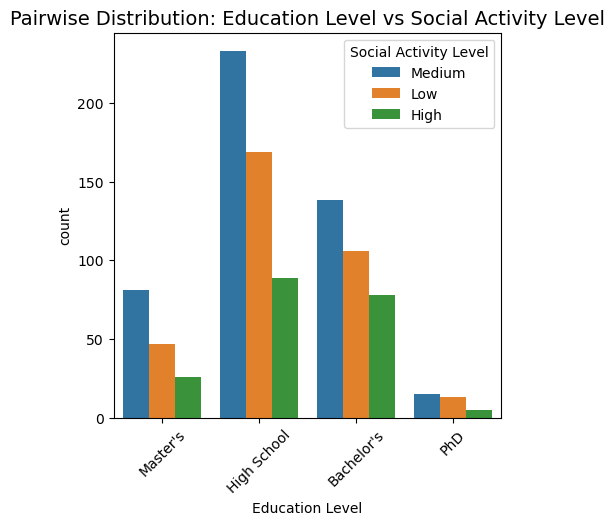

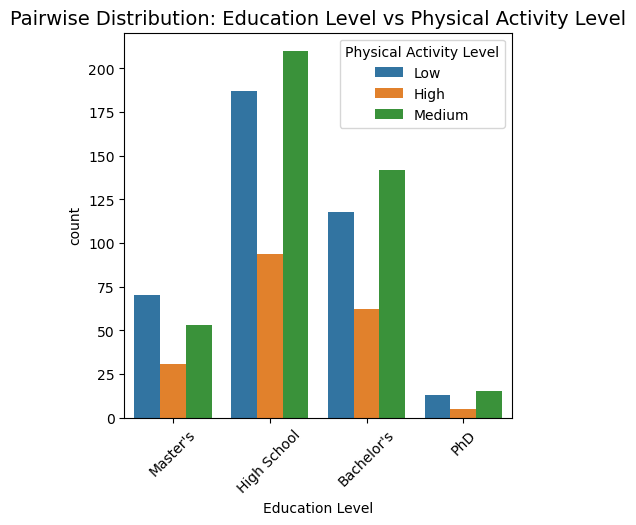

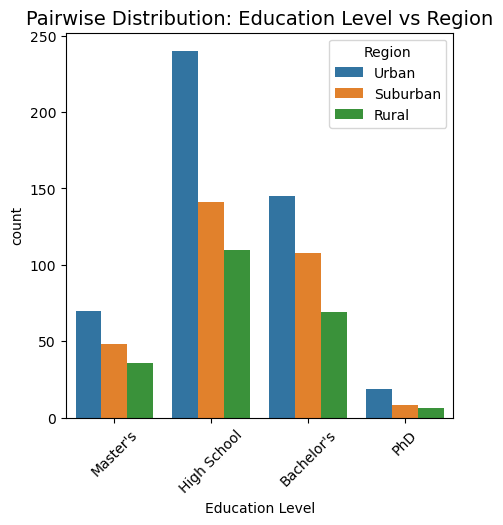

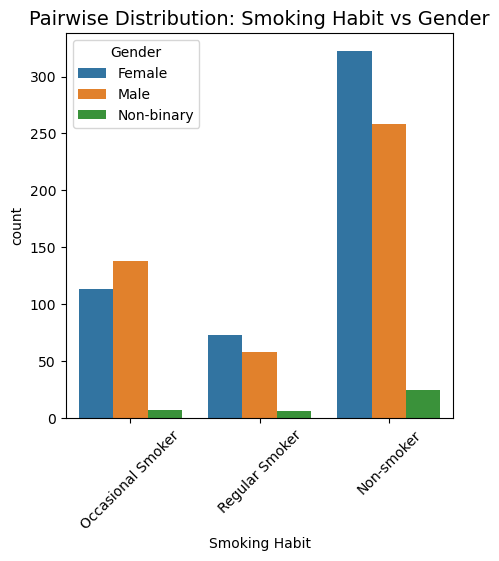

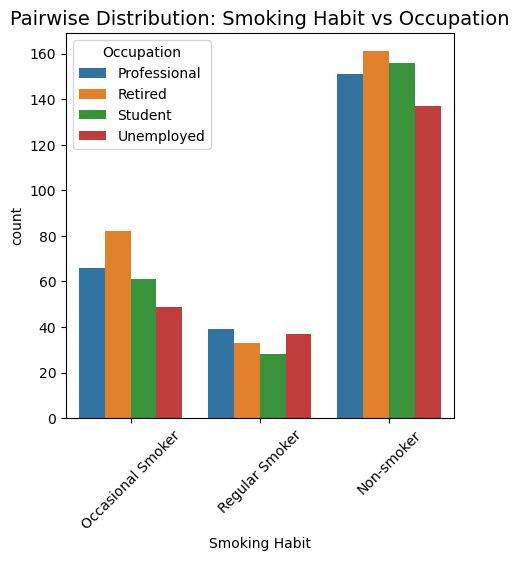

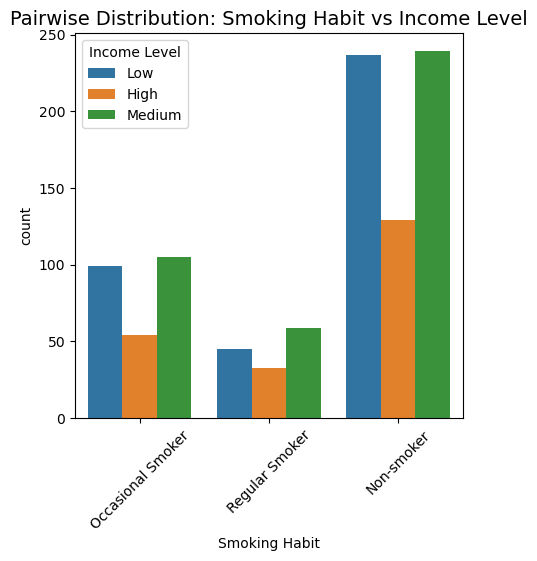

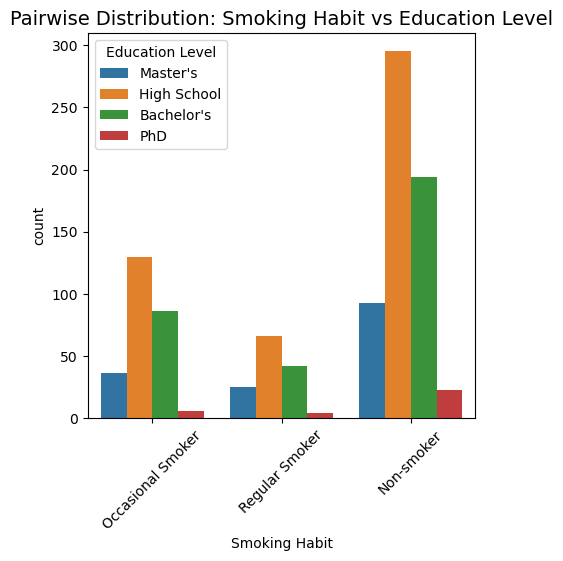

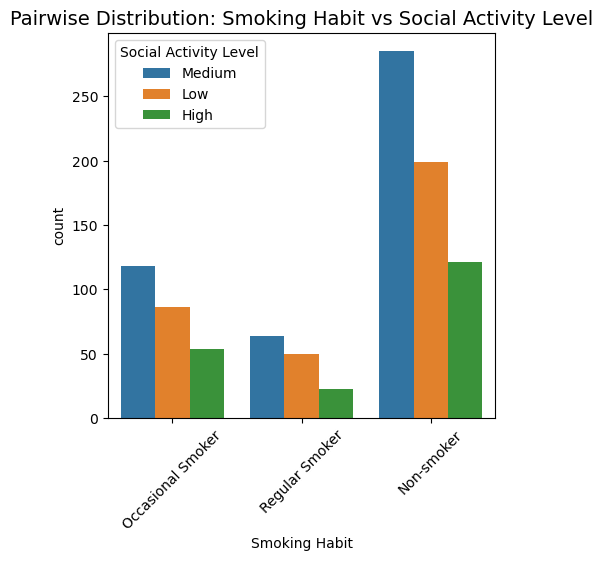

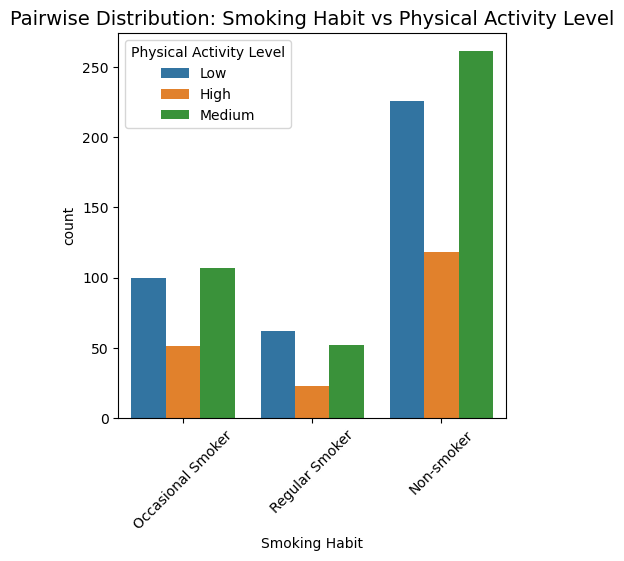

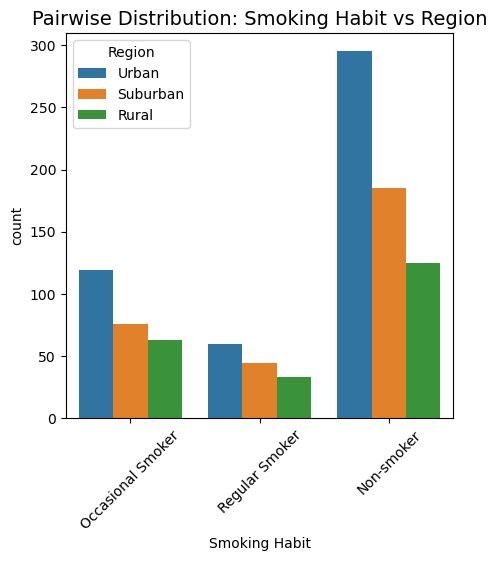

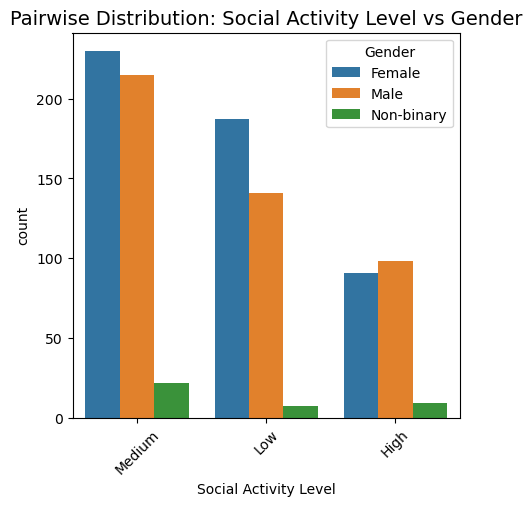

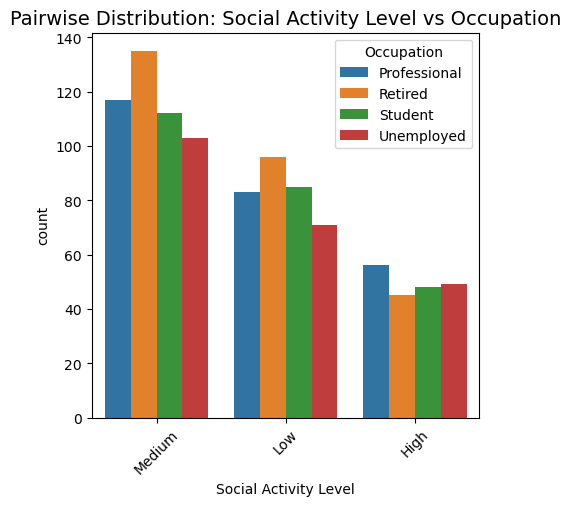

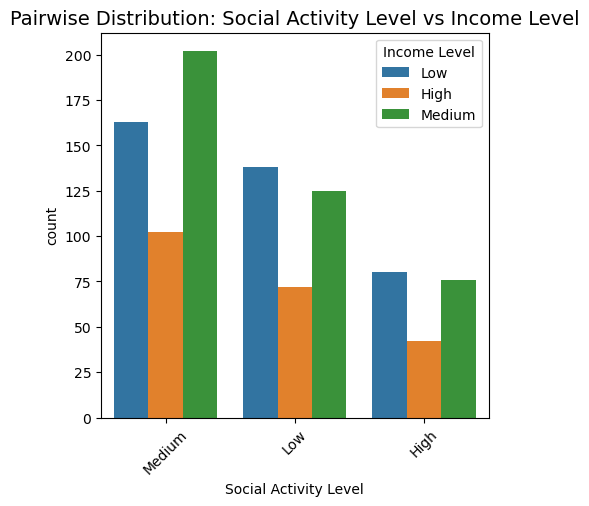

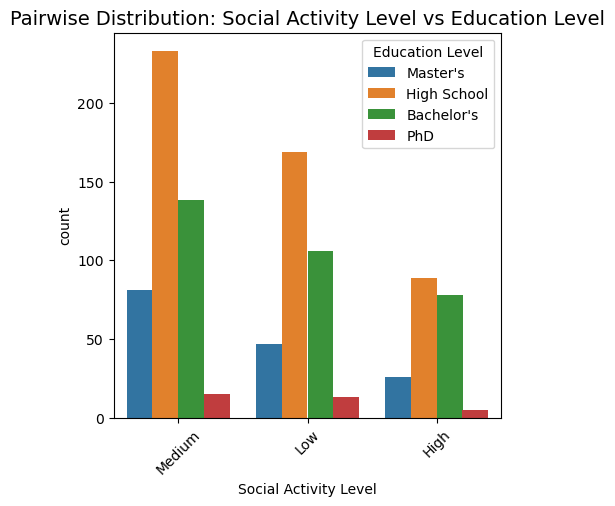

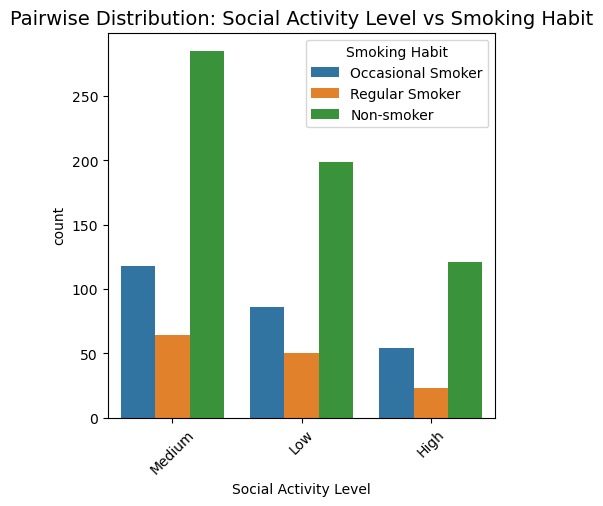

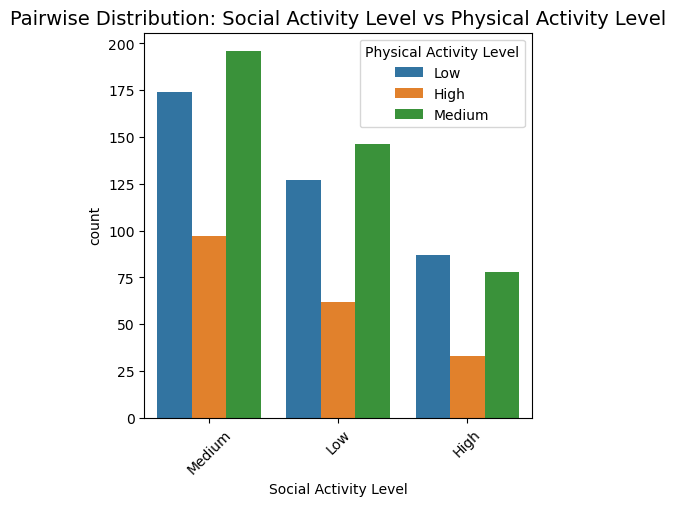

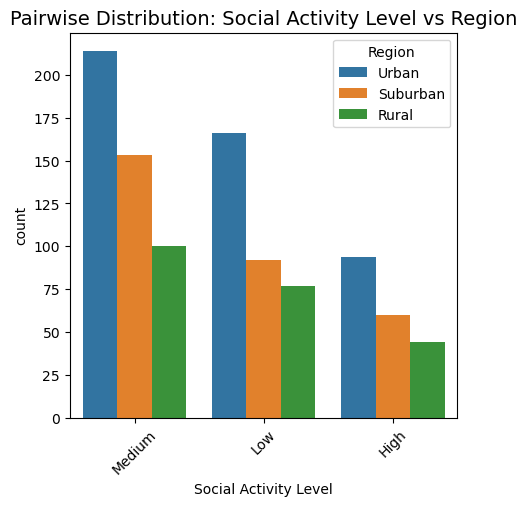

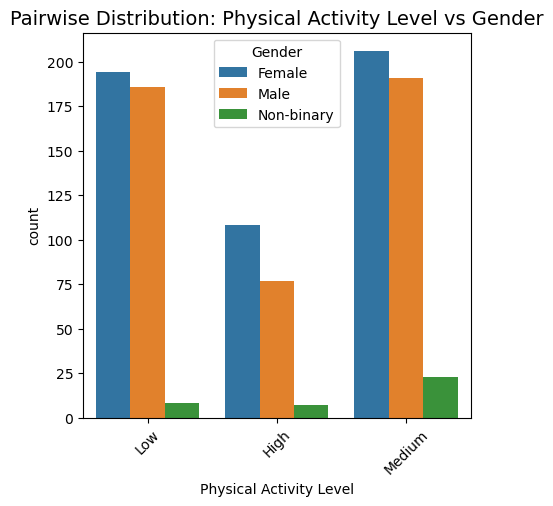

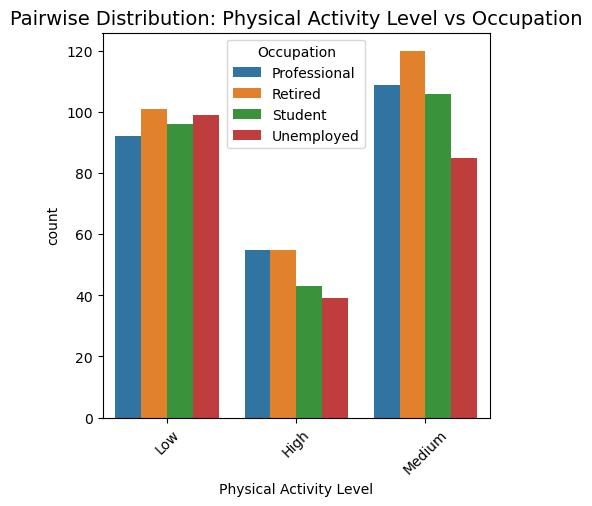

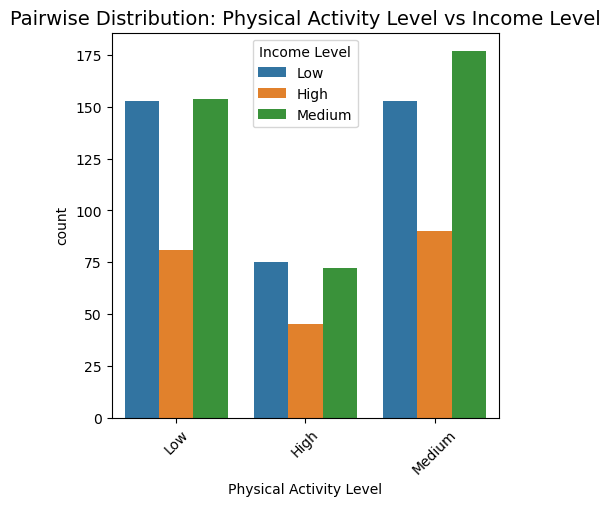

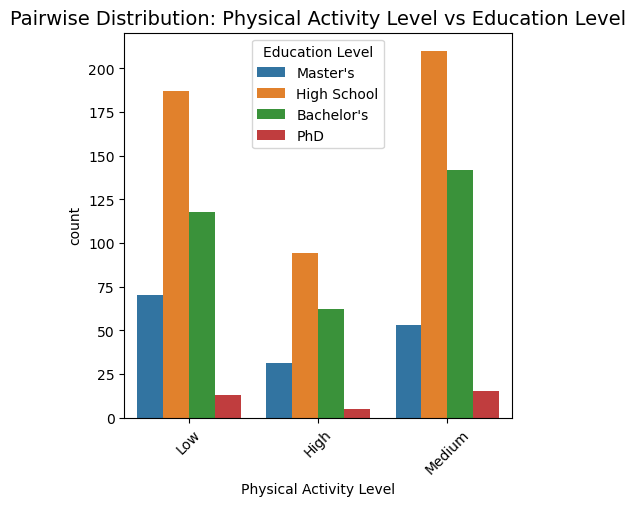

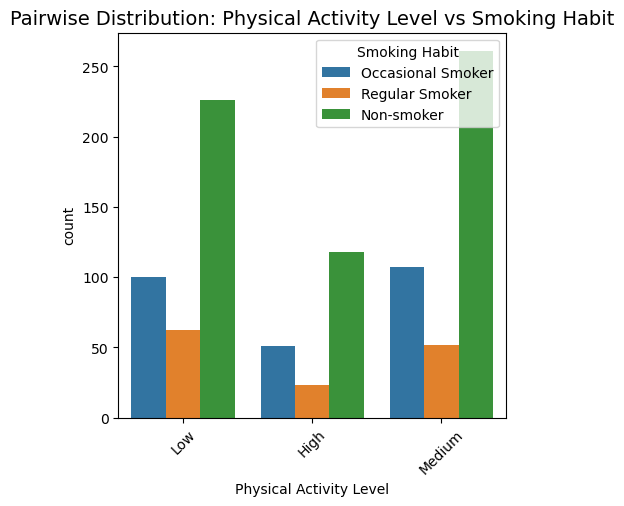

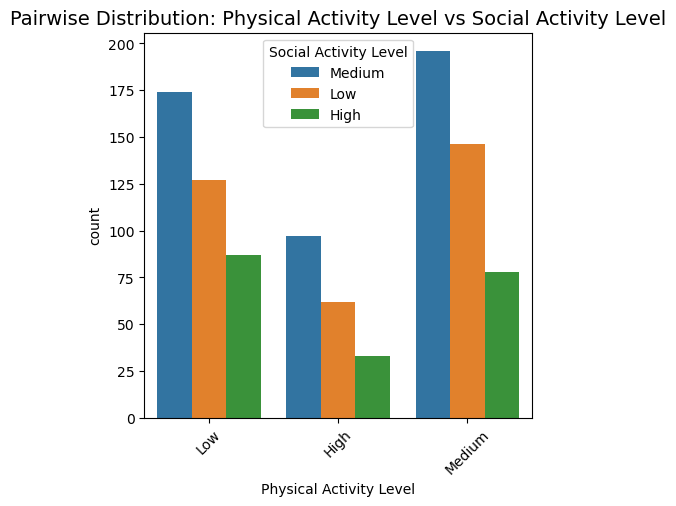

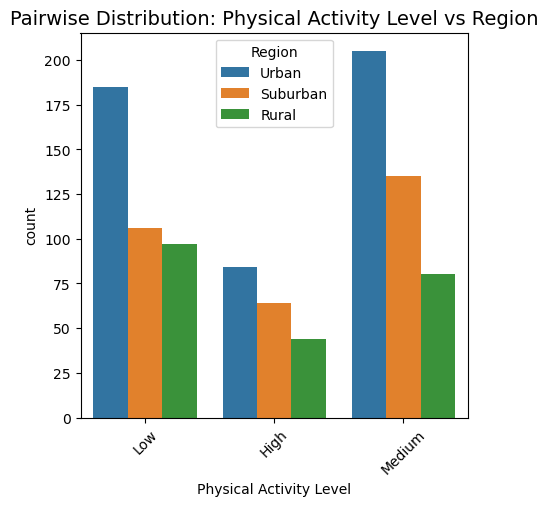

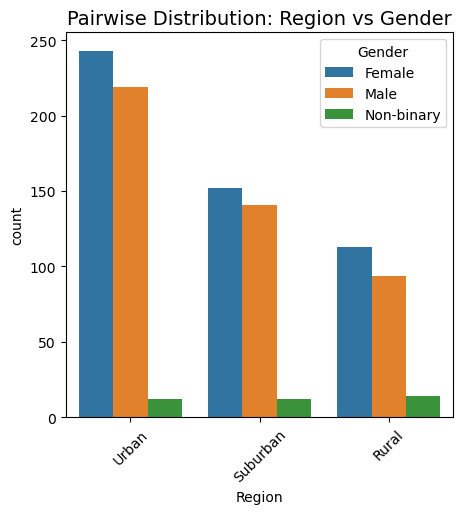

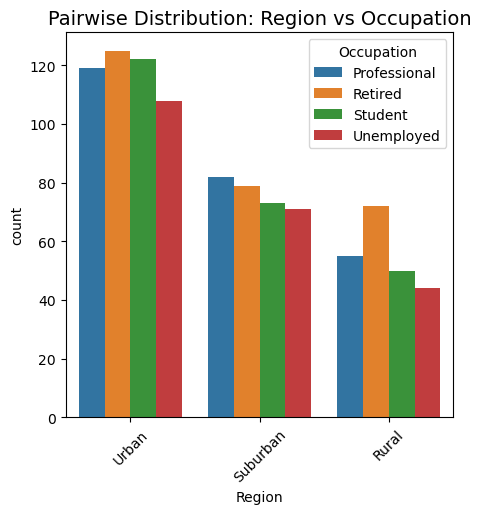

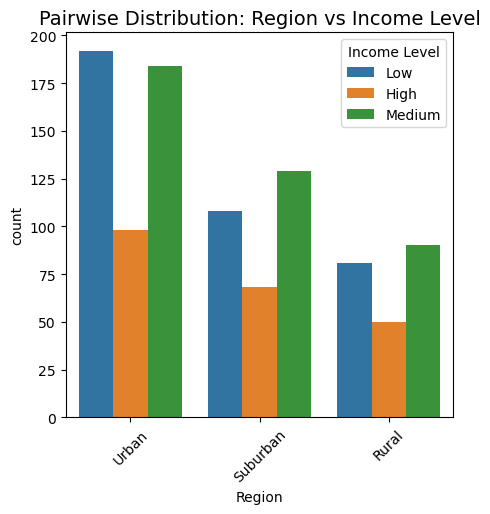

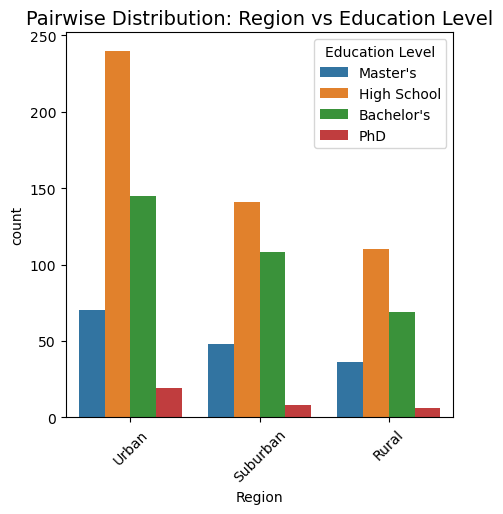

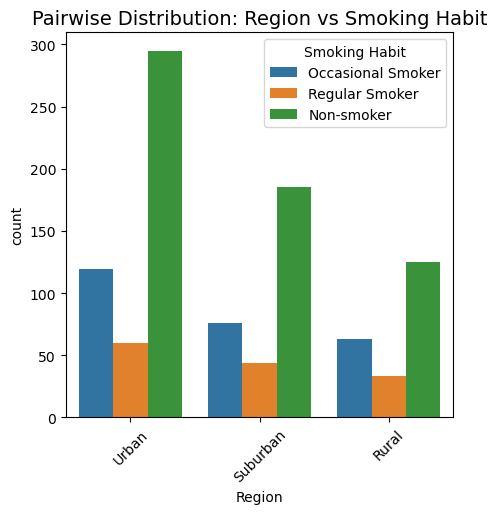

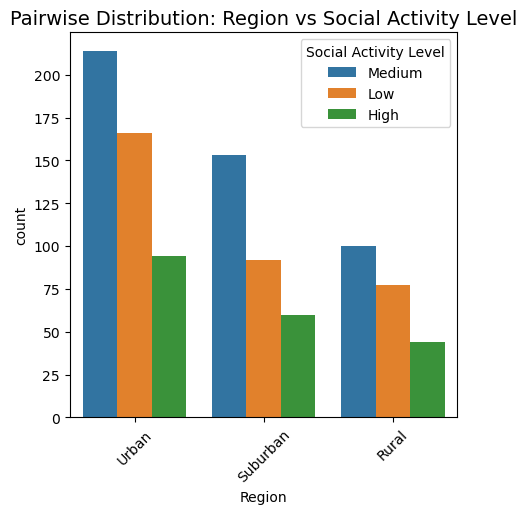

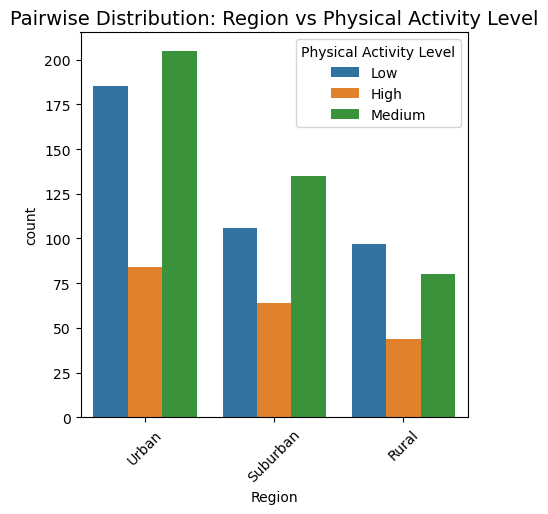

In [74]:
for col1 in cat_cols:
    for col2 in cat_cols:
        if col1 != col2:  # Avoid self-pairing
            plt.figure(figsize=(5, 5))
            sns.countplot(data=data, x=col1, hue=col2)
            plt.title(f'Pairwise Distribution: {col1} vs {col2}', fontsize=14)
            plt.xticks(rotation=45)
            plt.show()


Text(0.5, 0, 'ghh')

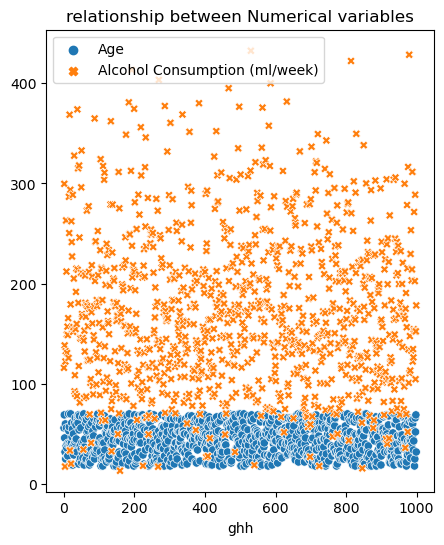

In [75]:
plt.figure(figsize = (5,6))
sns.scatterplot(data)
plt.title('relationship between Numerical variables')
plt.xlabel('ghh')


In [129]:
data['Gender'].value_counts()

Gender
Female        508
Male          454
Non-binary     38
Name: count, dtype: int64

In [84]:
cats = data.select_dtypes(exclude = 'number').columns
dummies = pd.get_dummies(data, columns= cats, drop_first=True)
dummies

,Age,Alcohol Consumption (ml/week),Gender_Male,Gender_Non-binary,Occupation_Retired,Occupation_Student,Occupation_Unemployed,Income Level_Low,Income Level_Medium,Education Level_High School,Education Level_Master's,Education Level_PhD,Smoking Habit_Occasional Smoker,Smoking Habit_Regular Smoker,Social Activity Level_Low,Social Activity Level_Medium,Physical Activity Level_Low,Physical Activity Level_Medium,Region_Suburban,Region_Urban
0,56,116.03,False,False,False,False,False,True,False,False,True,False,True,False,False,True,True,False,False,True
1,69,299.56,False,False,True,False,False,False,False,True,False,False,False,True,True,False,True,False,True,False
2,46,138.37,True,False,False,False,False,False,True,True,False,False,True,False,True,False,False,False,True,False
3,32,17.44,False,False,True,False,False,True,False,True,False,False,False,False,False,True,False,False,False,True
4,60,122.29,False,False,False,True,False,False,True,False,False,False,True,False,True,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,25,202.49,True,False,True,False,False,False,False,False,True,False,False,False,False,True,True,False,False,True
996,66,288.72,True,False,False,True,False,True,False,True,False,False,False,False,True,False,True,False,False,False
997,52,104.63,False,True,True,False,False,True,False,False,True,False,False,False,False,True,False,True,True,False
998,69,152.32,True,False,False,False,True,True,False,False,False,True,False,False,False,True,True,False,True,False


<Axes: >

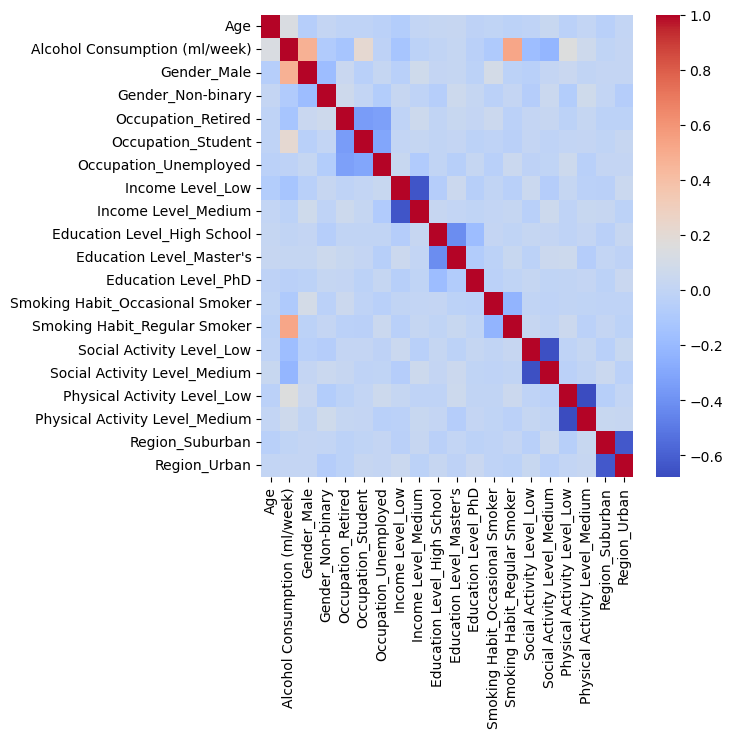

In [168]:
corr_matrix = dummies.corr()
plt.figure(figsize = (6,6))
sns.heatmap(corr_matrix, cmap='coolwarm')

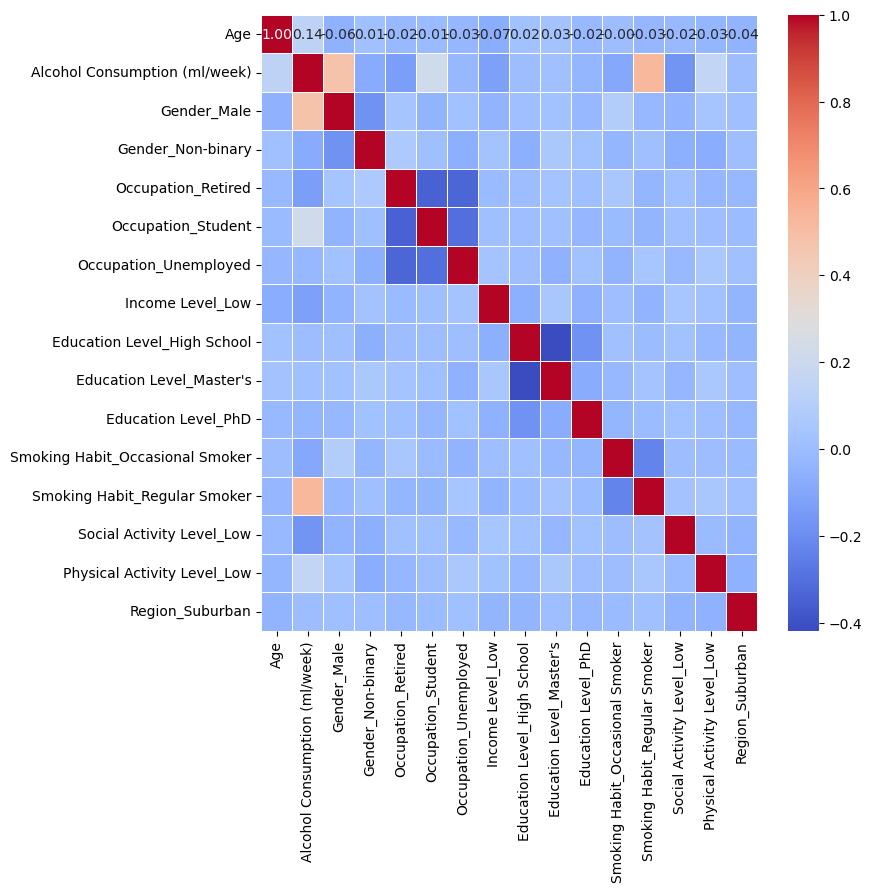

{'Income Level_Medium',
 'Physical Activity Level_Medium',
 'Region_Urban',
 'Social Activity Level_Medium'}

In [130]:
to_drop = set()

# Loop through each feature in the correlation matrix
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        # Skip the diagonal (i == j)
        if abs(corr_matrix.iloc[i, j]) > 0.6: ####### 0.8 should be better
            # Mark the column to drop
            colname = corr_matrix.columns[i]
            to_drop.add(colname)
dummies_cleaned = dummies.drop(columns=to_drop)
plt.figure(figsize=(8, 8))
sns.heatmap(dummies_cleaned.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()

to_drop

In [78]:
cat_cols

['Gender',
 'Occupation',
 'Income Level',
 'Education Level',
 'Smoking Habit',
 'Social Activity Level',
 'Physical Activity Level',
 'Region']

In [79]:
data.columns

Index(['Age', 'Gender', 'Occupation', 'Income Level', 'Education Level',
       'Smoking Habit', 'Social Activity Level', 'Physical Activity Level',
       'Region', 'Alcohol Consumption (ml/week)'],
      dtype='object')

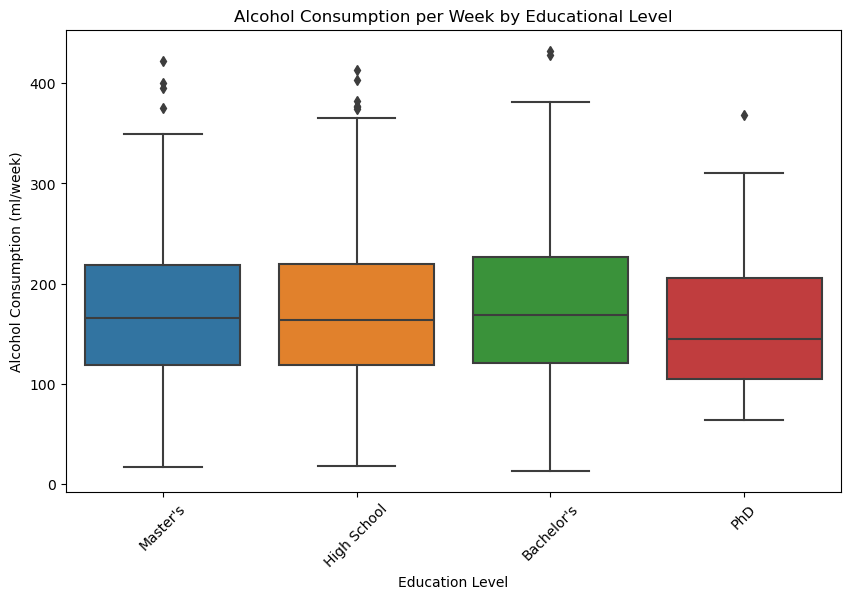

In [109]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Education Level', y='Alcohol Consumption (ml/week)', data=data)

# Adding labels and title
plt.xlabel('Education Level')
plt.ylabel('Alcohol Consumption (ml/week)')
plt.title('Alcohol Consumption per Week by Educational Level')

# Show the plot
plt.xticks(rotation=45)  # Rotate labels if they overlap
plt.show()

<Axes: xlabel='Education Level', ylabel='Alcohol Consumption (ml/week)'>

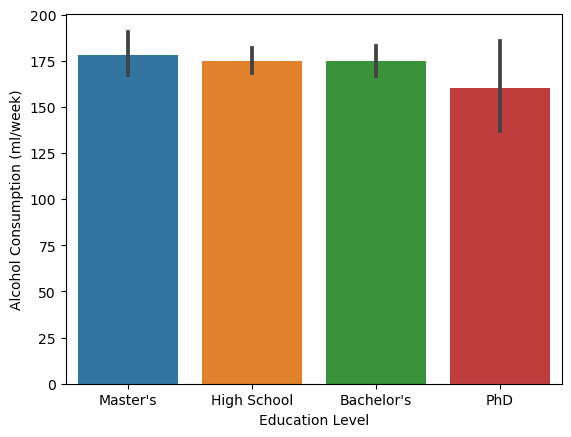

In [107]:
sns.barplot(x='Education Level', y='Alcohol Consumption (ml/week)', data=data, estimator=np.mean)


# Model Training

In [119]:
# prepare data 

# Split your data into features and target variable
X = dummies.drop(columns=['Alcohol Consumption (ml/week)']) 
y = dummies['Alcohol Consumption (ml/week)'] 

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [121]:
# Linear regression


linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)


In [122]:
# Decision Tree

tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)


In [133]:
# Random Forest Regressor model


rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


In [143]:
# Linear Regression
mse_linear = mean_squared_error(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
r2_score_linear = r2_score(y_test, y_pred_linear)

# Decision Tree Regressor
r2_score_tree = r2_score(y_test, y_pred_tree)
mse_tree = mean_squared_error(y_test, y_pred_tree)
mae_tree = mean_absolute_error(y_test, y_pred_tree)
rmse_tree = np.sqrt(mse_tree)

# Random Forest Regressor
r2_score_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

# Print the evaluation results
print("Linear Regression:")
print(f'r2 score linear: {r2_score_linear}')
print(f'Root mean squared linear: {rmse_linear}')
print(f"Mean Squared Error (MSE): {mse_linear}")
print(f"Mean Absolute Error (MAE): {mae_linear}\n")

print("Decision Tree Regressor:")
print(f'r2 score tree: {r2_score_tree}')
print(f'Root mean squared tree: {rmse_tree}')
print(f"Mean Squared Error (MSE): {mse_tree}")
print(f"Mean Absolute Error (MAE): {mae_tree}\n")

print("Random Forest Regressor:")
print(f'r2 score rf: {r2_score_rf}')
print(f'Root mean squared rf: {rmse_rf}')
print(f"Mean Squared Error (MSE): {mse_rf}")
print(f"Mean Absolute Error (MAE): {mae_rf}")


Linear Regression:
r2 score linear: 0.9264301097939543
Root mean squared linear: 20.115455930838237
Mean Squared Error (MSE): 404.63156730549525
Mean Absolute Error (MAE): 15.916754781859668

Decision Tree Regressor:
r2 score tree: 0.7127764584543999
Root mean squared tree: 39.74567189644679
Mean Squared Error (MSE): 1579.7184344999998
Mean Absolute Error (MAE): 30.03435

Random Forest Regressor:
r2 score rf: 0.8686936174342688
Root mean squared rf: 26.873407957760957
Mean Squared Error (MSE): 722.1800552642499
Mean Absolute Error (MAE): 20.8393135


In [145]:
X_train.head(2)

,Age,Gender_Male,Gender_Non-binary,Occupation_Retired,Occupation_Student,Occupation_Unemployed,Income Level_Low,Income Level_Medium,Education Level_High School,Education Level_Master's,Education Level_PhD,Smoking Habit_Occasional Smoker,Smoking Habit_Regular Smoker,Social Activity Level_Low,Social Activity Level_Medium,Physical Activity Level_Low,Physical Activity Level_Medium,Region_Suburban,Region_Urban
29,39,False,False,True,False,False,False,True,False,True,False,False,True,False,False,False,True,True,False
535,33,False,False,False,True,False,False,True,False,False,False,True,False,False,True,True,False,False,True


In [158]:
X_train.shape

(800, 19)

In [166]:
anaclet = [30, True, False, False, False, False, False, True, False, False, False, False, False, True, False, False, True, False, True]
anaclet = np.array(anaclet).reshape(1, -1)
y_pred_linear3 = linear_model.predict(anaclet)
y_pred_linear3

C:\Users\USER\AppData\Local\anaconda3\envs\Python1\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([157.57847006])

In [156]:
test = X_train.iloc[:29].values.reshape(1,-1)

In [154]:
y_pred_linear1 = linear_model.predict(test)
y_pred_linear1

C:\Users\USER\AppData\Local\anaconda3\envs\Python1\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([88.23409715])

In [161]:
anastase = [[12, False, False, False, False, False, False, True, True, False, False, False, True, False, True, False, False, False, True]]
y_pred_linear2 = linear_model.predict(anastase)
y_pred_linear2

C:\Users\USER\AppData\Local\anaconda3\envs\Python1\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([146.64605854])

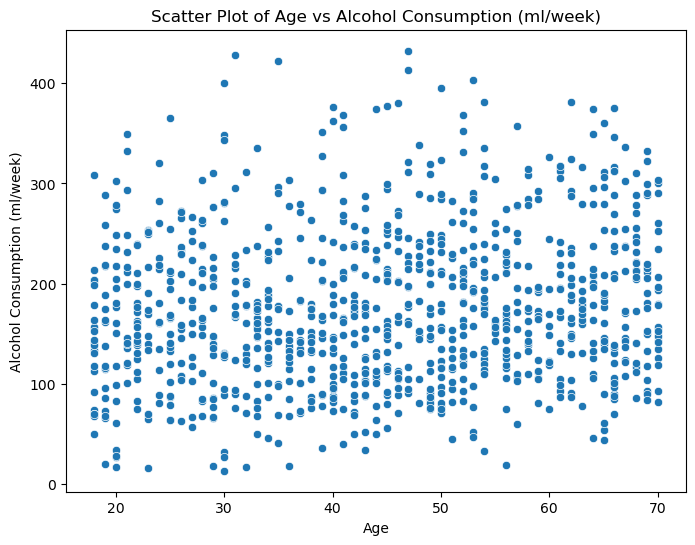

In [169]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Age', y='Alcohol Consumption (ml/week)', data=data)
plt.xlabel('Age')
plt.ylabel('Alcohol Consumption (ml/week)')
plt.title('Scatter Plot of Age vs Alcohol Consumption (ml/week)')
plt.show()

So far Linear regression is the best performing model. 
Though it is performing better than others, It is still have large error. We need to improve its performance, by keeping the minimal MAE and MSE.